# distribution of acceptance

In [1]:
import pandas as pd, numpy as np
import sys; sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac/'); 
from my_tools import *
from plot_tools import *
import matplotlib.patches as patches
%matplotlib inline

In [2]:
acceptance_variable_e = pd.read_csv('/Users/erezcohen/Desktop/DataMining/GSIM_DATA/csv_files/output_Prec_events_run2002.csv') # runs: 2000,2002
acceptance_fixed_e = pd.read_csv('/Users/erezcohen/Desktop/DataMining/GSIM_DATA/csv_files/output_Prec_events_run2003.csv')

In [3]:
figures_path = '/Users/erezcohen/Desktop/Projects/2NSRC/CLASppCMnote/Figures/ResposeToReviewers/'

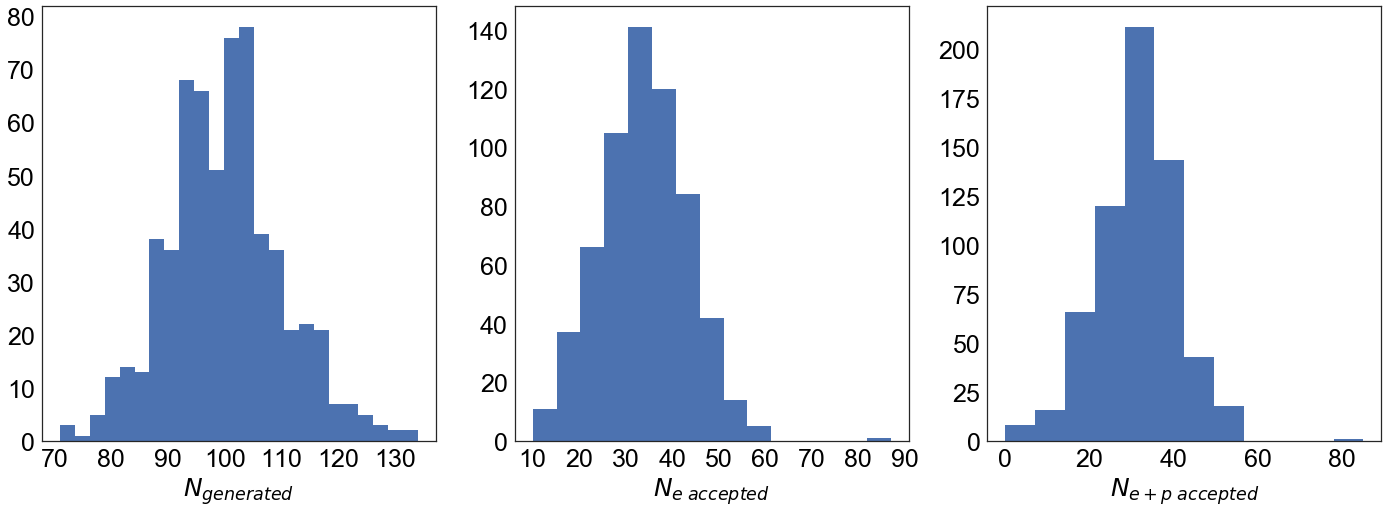

In [4]:
fig=plt.figure(figsize=(24,8))
ax = fig.add_subplot(1,3,1)
plt.hist(acceptance_variable_e.N_generated_in_event,bins=24);
set_axes(ax,r'$N_{generated}$')

ax = fig.add_subplot(1,3,2)
plt.hist(acceptance_variable_e.e_accepted_in_event,bins=15);
set_axes(ax,r'$N_{e \; accepted}$')

ax = fig.add_subplot(1,3,3)
plt.hist(acceptance_variable_e.ep_accepted_in_event,bins=12);
set_axes(ax,r'$N_{e+p \; accepted}$')

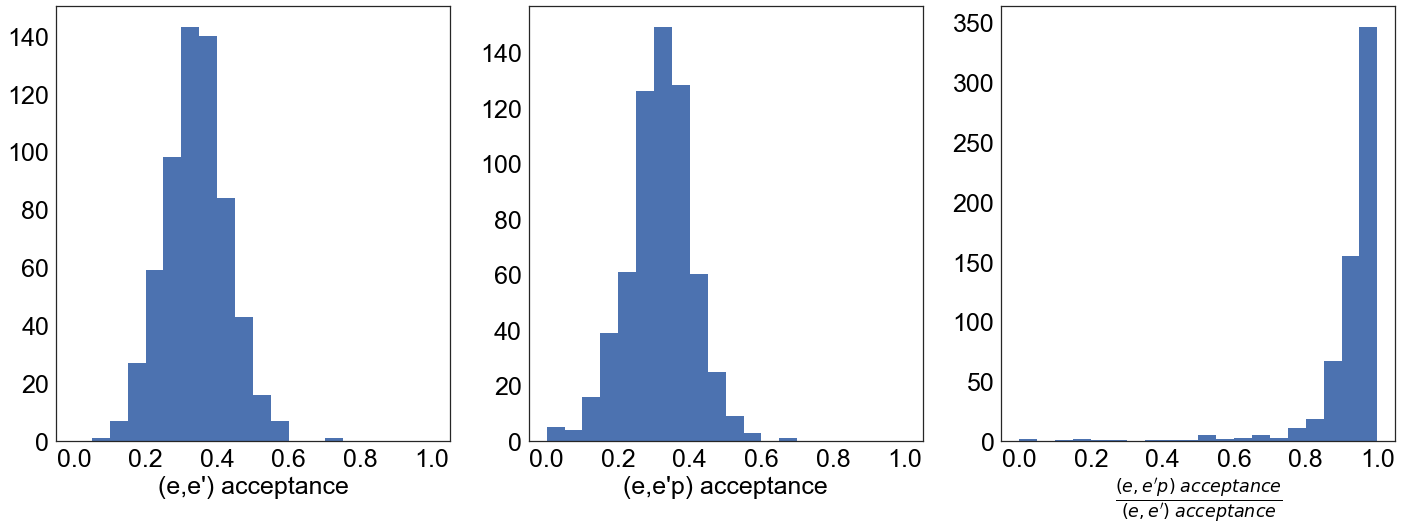

In [5]:
e_acceptance = np.array(acceptance_variable_e['e_accepted_in_event']/acceptance_variable_e['N_generated_in_event'])
ep_acceptance = np.array(acceptance_variable_e['ep_accepted_in_event']/acceptance_variable_e['N_generated_in_event'])
ep_acceptance_e_acceptance = [ep_acceptance[i]/(e_acceptance[i] if e_acceptance[i]>0 else 1)  for i in range(len(e_acceptance))]


fig=plt.figure(figsize=(24,8))

ax = fig.add_subplot(1,3,1)
plt.hist(e_acceptance,bins=np.linspace(0,1,21));
set_axes(ax,r"(e,e') acceptance")

ax = fig.add_subplot(1,3,2)
plt.hist(ep_acceptance,bins=np.linspace(0,1,21));
set_axes(ax,r"(e,e'p) acceptance")

ax = fig.add_subplot(1,3,3)
plt.hist(ep_acceptance_e_acceptance,bins=np.linspace(0,1,21));
set_axes(ax,r"$\frac{(e,e'p) \; acceptance}{(e,e') \; acceptance}$")

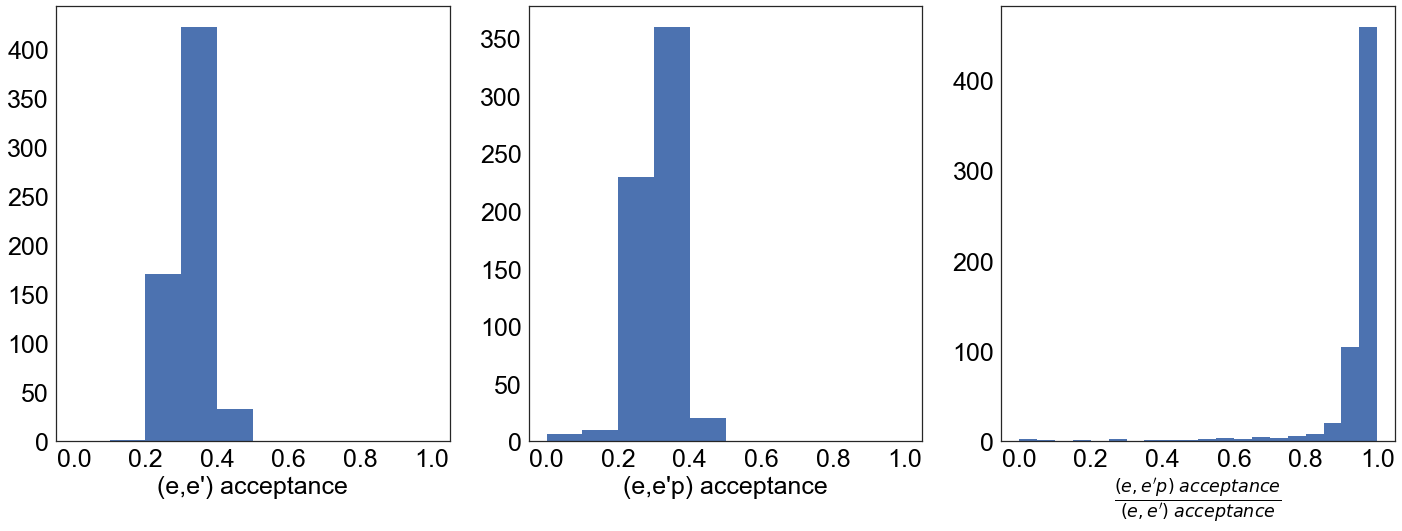

In [6]:
e_acceptance = np.array(acceptance_fixed_e['e_accepted_in_event']/acceptance_fixed_e['N_generated_in_event'])
ep_acceptance = np.array(acceptance_fixed_e['ep_accepted_in_event']/acceptance_fixed_e['N_generated_in_event'])
ep_acceptance_e_acceptance = [ep_acceptance[i]/(e_acceptance[i] if e_acceptance[i]>0 else 1)  for i in range(len(e_acceptance))]


fig=plt.figure(figsize=(24,8))

ax = fig.add_subplot(1,3,1)
plt.hist(e_acceptance,bins=np.linspace(0,1,11));
set_axes(ax,r"(e,e') acceptance")

ax = fig.add_subplot(1,3,2)
plt.hist(ep_acceptance,bins=np.linspace(0,1,11));
set_axes(ax,r"(e,e'p) acceptance")

ax = fig.add_subplot(1,3,3)
plt.hist(ep_acceptance_e_acceptance,bins=np.linspace(0,1,21));
set_axes(ax,r"$\frac{(e,e'p) \; acceptance}{(e,e') \; acceptance}$")

# acceptance as a funtion of recoil proton kinematics

In [7]:
mom = 0.6
theta_line = np.linspace(20,120,50)
fixed_theta = 60
def fa(p):
    return p[0] + p[1]*np.exp(p[2]*(mom-p[3]))
def fb(p):
    return p[0] + p[1]*mom*np.exp(p[2]*np.square(mom-p[3]))
def ftheta_min(p):
    return p[0] + p[1]/np.square(mom) + p[2]*mom + p[3]/mom + p[4]*np.exp(p[5]*mom)

def phi_limits(sector , DeltaPhi_min, DeltaPhi_max):
    return (60.*sector - DeltaPhi_min) , (60.*sector + DeltaPhi_max)
def Delta_phi(a,theta_min,b):
    return (a * (1 - 1./( ((theta_line - theta_min)/b) + 1 ) ))


# sectors:
phi_min_array,phi_max_array=[],[]

# sector 1
sector=1
DeltaPhi_min=Delta_phi( fa([25,-12,1.644,4.4]),ftheta_min([7,0.207,0.169,0.1,0.1,-0.1]),fb([4,2,-0.978,0.5]))
DeltaPhi_max=Delta_phi(fa([25,-11.9735,0.803,4.4]),ftheta_min([7,0.207,0.169,0.1,0.1,-0.1]),fb([2.53,0.442,-2,1.02]))
phi_min_max = phi_limits(sector=1 , DeltaPhi_min=DeltaPhi_min, DeltaPhi_max=DeltaPhi_max)
print 'phi limits in sector ',sector,':'
print np.min(phi_min_max),'->',np.max(phi_min_max)
phi_min_array.append(np.min(phi_min_max))
phi_max_array.append(np.max(phi_min_max))


# sector 2
sector=2
DeltaPhi_min=Delta_phi( fa([25.,-12.,1.519,4.4]),ftheta_min([5.5,0.1,0.506,0.1,3.307,-0.652]),fb([4.,2.,-2.,0.5]))
DeltaPhi_max=Delta_phi(fa([24.81,-8.,0.85,4.8]),ftheta_min([5.5,0.1,0.506,0.1,3.307,-0.652]),fb([2.65,0.201,-0.179,1.6]))
phi_min_max = phi_limits(sector=2 , DeltaPhi_min=DeltaPhi_min, DeltaPhi_max=DeltaPhi_max)
print 'phi limits in sector ',sector,':'
print np.min(phi_min_max),'->',np.max(phi_min_max)
phi_min_array.append(np.min(phi_min_max))
phi_max_array.append(np.max(phi_min_max))



# sector 3
sector=3
DeltaPhi_min=Delta_phi( fa([25.,-12.,1.1095,4.4]),ftheta_min([7.06,0.127,-0.066,0.100,4.499,-3.17]),fb([2.784,2,-1.73,0.5]))
DeltaPhi_max=Delta_phi(fa([24.87,-8.,1.0125,4.8]),ftheta_min([7.06,0.127,-0.066,0.100,4.499,-3.17]),fb([3.17,1.275,-2,0.5]))
phi_min_max = phi_limits(sector=3 , DeltaPhi_min=DeltaPhi_min, DeltaPhi_max=DeltaPhi_max)
print 'phi limits in sector ',sector,':'
print np.min(phi_min_max),'->',np.max(phi_min_max)
phi_min_array.append(np.min(phi_min_max))
phi_max_array.append(np.max(phi_min_max))



# sector 4
sector=4
DeltaPhi_min=Delta_phi( fa([25.,-12.,0.9778,4.4]),ftheta_min([6.32,0.1,0.2217,0.1,5.31,-3.3]),fb([3.58,1.38,-2,0.5]))
DeltaPhi_max=Delta_phi(fa([25,-12,0.911,4.4]),ftheta_min([6.32,0.1,0.2217,0.1,5.31,-3.3]),fb([2.47,1.76,-1.894,1.04]))
phi_min_max = phi_limits(sector=4 , DeltaPhi_min=DeltaPhi_min, DeltaPhi_max=DeltaPhi_max)
print 'phi limits in sector ',sector,':'
print np.min(phi_min_max),'->',np.max(phi_min_max)
phi_min_array.append(np.min(phi_min_max))
phi_max_array.append(np.max(phi_min_max))



# sector 5
sector=5
DeltaPhi_min=Delta_phi( fa([25.,-12.,0.955366,4.4]),ftheta_min([5.5,0.211,0.6409,0.1,3.2,-1.108]),fb([3.32277,0.041,-0.954,0.5]))
DeltaPhi_max=Delta_phi(fa([25.,-8.526,0.683,4.8]),ftheta_min([5.5,0.211,0.6409,0.1,3.2,-1.108]),fb([2.424,1.254,-2,0.8157]))
phi_min_max = phi_limits(sector=5 , DeltaPhi_min=DeltaPhi_min, DeltaPhi_max=DeltaPhi_max)
print 'phi limits in sector ',sector,':'
print np.min(phi_min_max),'->',np.max(phi_min_max)
phi_min_array.append(np.min(phi_min_max))
phi_max_array.append(np.max(phi_min_max))



# sector 6
sector=6
DeltaPhi_min=Delta_phi( fa([25.,-12.,0.969,4.4]),ftheta_min([5.5,0.2816,0.358,0.1,0.776,-0.46]),fb([4,2,-2,1.086]))
DeltaPhi_max=Delta_phi(fa([25,-8,0.888,4.8]),ftheta_min([5.5,0.2816,0.358,0.1,0.776,-0.46]),fb([2.64,0.159,-2,1.31]))
phi_min_max = phi_limits(sector=0 , DeltaPhi_min=DeltaPhi_min, DeltaPhi_max=DeltaPhi_max)
print 'phi limits in sector ',sector,':'
print np.min(phi_min_max),'->',np.max(phi_min_max)
phi_min_array.append(np.min(phi_min_max))
phi_max_array.append(np.max(phi_min_max))



phi limits in sector  1 :
36.1284441501 -> 83.8554927116
phi limits in sector  2 :
96.1446523761 -> 143.992903287
phi limits in sector  3 :
156.027024951 -> 203.917506877
phi limits in sector  4 :
216.22139055 -> 263.941338966
phi limits in sector  5 :
276.036052235 -> 323.852005913
phi limits in sector  6 :
-23.6998994961 -> 24.2330775556


In [8]:
def add_phi_fiducials(ax,ymax):
    for i_phi in range(4):
        ax.add_patch(
            patches.Rectangle(
                (phi_max_array[i_phi], 0),   # (x,y)
                phi_min_array[i_phi+1] - phi_max_array[i_phi],          # width
                ymax,
            color='black',alpha=0.9        
                ))
    ax.add_patch(
        patches.Rectangle(
        (phi_max_array[5], 0),   # (x,y)
        phi_min_array[0] - phi_max_array[5],          # width
        ymax,          # height
            color='black',alpha=0.9        
        )
    )

In [10]:
simulated_data = dict()
for gsim_run in [2000,2001,2002,2003]:
    simulated_data['run %d'%gsim_run] = pd.read_csv('/Users/erezcohen/Desktop/DataMining/GSIM_DATA/csv_files/output_data_run%d'%gsim_run+'.csv')
    print len(simulated_data['run %d'%gsim_run]),'events in run',gsim_run

6242 events in run 2000
6258 events in run 2001
62584 events in run 2002
62584 events in run 2003


In [11]:
var_e_sims = pd.concat([simulated_data['run 2000'],simulated_data['run 2002']])
fixed_e_sims = pd.concat([simulated_data['run 2001'],simulated_data['run 2003']])

In [32]:

def Prec_acceptance_superratio(bins=np.linspace(-181,181,91)
                               ,Prec_var = 'phi'
                               ,x_label = r'$\phi_{recoil}$ [deg.]'
                               ,do_add_mean_sigma=True
                               ,do_add_1d_hist=False
                               ,var2fixed_bins=np.linspace(0.05,1,11)
                               ,do_add_phi_fiducials=False
                               ,cut_limits=None
                               ,do_save_fig=False):
    fig = plt.figure(figsize=(16,12))
    ax = fig.add_subplot(2,2,1)
    hvar = dict()
    for var,label,color in zip(['Prec_'+Prec_var+'_g','Prec_'+Prec_var]
                         ,['generated','reconstructed']
                         ,['tomato','royalblue']):
        hvar[label],bins,_=plt.hist(var_e_sims[var],label=label,color=color,bins=bins,histtype='step',linewidth=3);
        mid = 0.5*(bins[1:]+bins[:-1])
    set_axes(ax,x_label,do_add_grid=True,do_add_legend=True,title='variable electron',ylim=(0,1.2*np.max(hvar['generated'])))
    hvar['acceptance'] = [hvar['reconstructed'][i]/hvar['generated'][i] if hvar['generated'][i] else 0 for i in range(len(hvar['reconstructed']))]
    if do_add_phi_fiducials:
        add_phi_fiducials(ax=ax,ymax=np.max(hvar['generated']))
    # ax = fig.add_subplot(3,2,3)
    # plt.plot(mid , hvar['acceptance'] )
    # set_axes(ax,r'$\phi_{recoil}$ [deg.]','acceptance',do_add_grid=True,do_add_legend=True)


    ax = fig.add_subplot(2,2,2)
    hfixed = dict()
    for var,label,color in zip(['Prec_'+Prec_var+'_g','Prec_'+Prec_var]
                         ,['generated','reconstructed']
                         ,['tomato','royalblue']):
        hfixed[label],bins,_=plt.hist(fixed_e_sims[var],label=label,color=color,bins=bins,histtype='step',linewidth=3);
    set_axes(ax,x_label,do_add_grid=True,do_add_legend=False,title='fixed electron',ylim=(0,1.2*np.max(hfixed['generated'])))
    hfixed['acceptance'] = [hfixed['reconstructed'][i]/hfixed['generated'][i] if hfixed['generated'][i] else 0 for i in range(len(hfixed['reconstructed']))]
    if do_add_phi_fiducials: add_phi_fiducials(ax=ax,ymax=np.max(hfixed['generated']))

    # ax = fig.add_subplot(3,2,4)
    # plt.plot(mid , hfixed['acceptance'] )
    # set_axes(ax,r'$\phi_{recoil}$ [deg.]',do_add_grid=True,do_add_legend=True)

    if do_add_1d_hist:
        ax = fig.add_subplot(2,2,3)
    else:
        ax = fig.add_subplot(2,2,(3,4))
    hvar2fixed = [hvar['acceptance'][i]/hfixed['acceptance'][i] if hfixed['acceptance'][i] else 0 for i in range(len(hvar['acceptance']))]
    plt.plot(mid , hvar2fixed ,linewidth=3)
    if do_add_phi_fiducials: add_phi_fiducials(ax=ax,ymax=np.max(ax.get_ylim()))

    if cut_limits is not None:
        plt.plot([np.min(cut_limits),np.min(cut_limits)] , ax.get_ylim(), '--'
                 ,[np.max(cut_limits),np.max(cut_limits)] , ax.get_ylim(), '--',color='black' ,linewidth=3)
        acceptance_values = []
        for i in range(len(hvar2fixed)):
            if mid[i]>np.min(cut_limits) and mid[i]<np.max(cut_limits):
                acceptance_values.append(hvar2fixed[i])
    else:
        acceptance_values = hvar2fixed
        
    if do_add_mean_sigma:
        mean = np.mean(acceptance_values)
        sigma = np.std(acceptance_values)
    plt.plot(cut_limits,[mean,mean],'-',color='black',label='mean')
    plt.fill_between(cut_limits,[mean-sigma,mean-sigma],[mean+sigma,mean+sigma],color='black',alpha=0.2
                     ,label='standard deviation: %.1f'%(100.*sigma)+'%')


    set_axes(ax,x_label,r'$\frac{variable-e}{fixed-e}$'
             ,do_add_grid=True,do_add_legend=True
             ,ylim=(0,np.max(ax.get_ylim())))

    
    
    if do_add_1d_hist:
        ax = fig.add_subplot(2,2,4)
        plt.hist( acceptance_values , bins=var2fixed_bins )
        set_axes(ax,r'$\frac{variable-e}{fixed-e}$','frequency [a.u.]',do_add_grid=True,do_add_legend=True)
        plt.text(np.min(ax.get_xlim())+0.1*(np.max(ax.get_xlim())-np.min(ax.get_xlim()))
                 ,0.8*np.max(ax.get_ylim()),r'$\sigma=%.1f$'%(100.*sigma)+'%',fontsize=25)

    plt.tight_layout()
    if do_save_fig:
        fig.savefig(figures_path+'Prec_'+Prec_var+'_var2fixed_electron_acceptance.pdf')
        print 'saved',figures_path+'Prec_'+Prec_var+'_var2fixed_electron_acceptance.pdf'

saved /Users/erezcohen/Desktop/Projects/2NSRC/CLASppCMnote/Figures/ResposeToReviewers/Prec_P_var2fixed_electron_acceptance.pdf


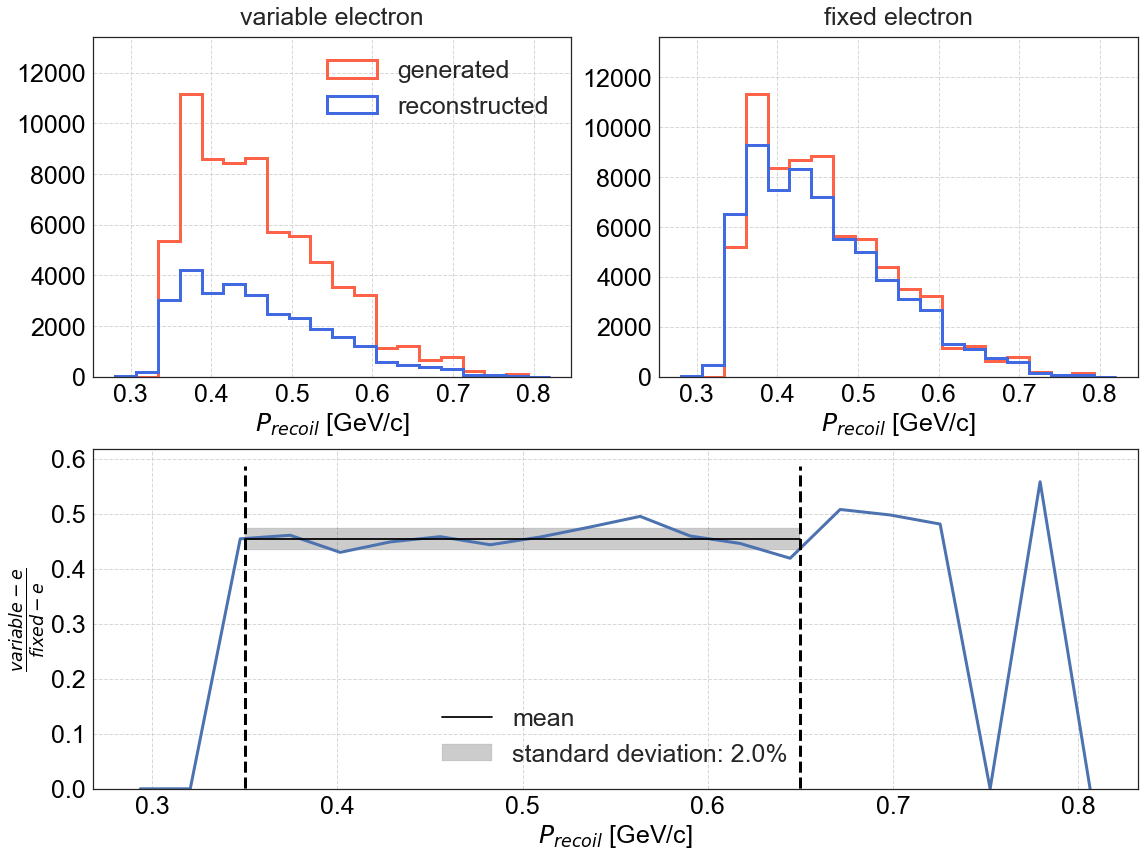

In [33]:
Prec_acceptance_superratio(Prec_var = 'P',x_label = r'$P_{recoil}$ [GeV/c]'
                           ,bins=np.linspace(0.28,0.82,21),var2fixed_bins=np.linspace(0.05,1,35)
                           ,cut_limits=(0.35,0.65),do_save_fig=True)

saved /Users/erezcohen/Desktop/Projects/2NSRC/CLASppCMnote/Figures/ResposeToReviewers/Prec_theta_var2fixed_electron_acceptance.pdf


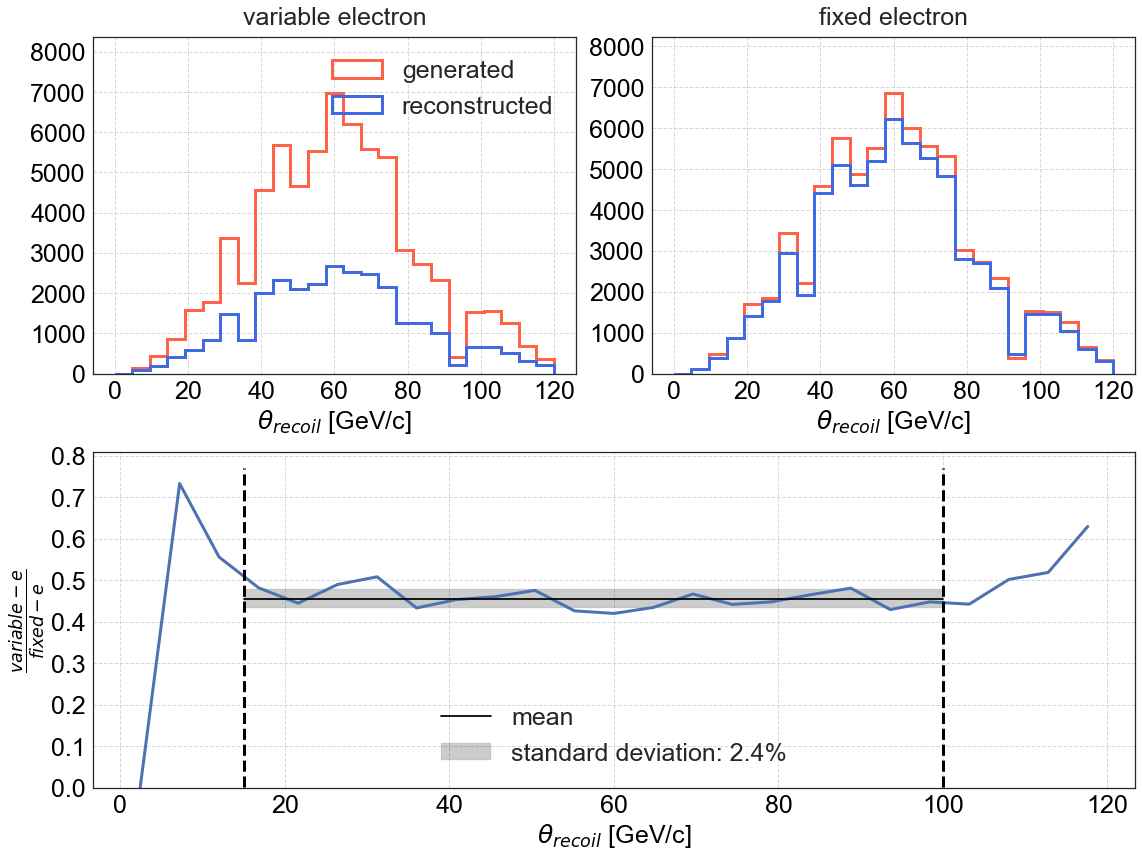

In [34]:
Prec_acceptance_superratio(Prec_var = 'theta',x_label = r'$\theta_{recoil}$ [GeV/c]'
                           ,bins=np.linspace(0,120,26)
                           ,var2fixed_bins=np.linspace(0.05,1,23)
                           ,cut_limits=(15,100)
                           ,do_save_fig=True)

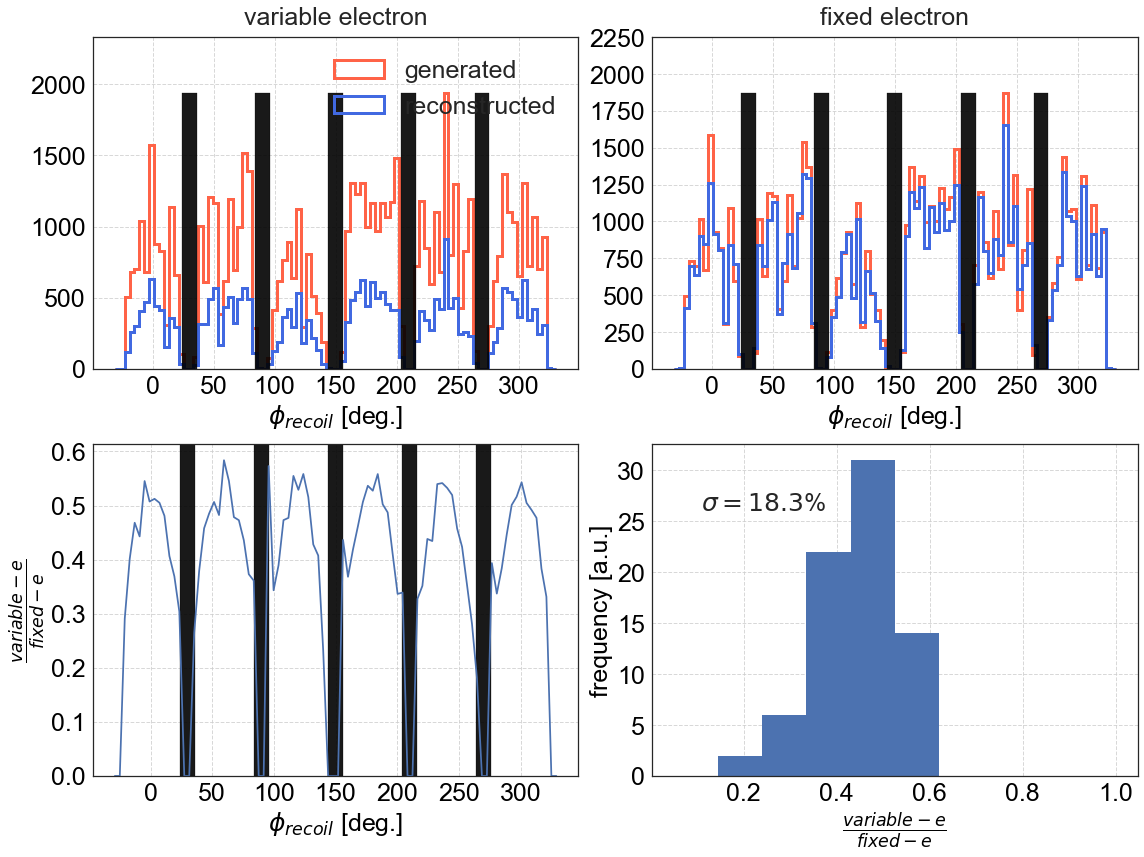

In [31]:
Prec_acceptance_superratio(bins=np.linspace(-31,331,91)
                               ,Prec_var = 'phi'
                               ,x_label = r'$\phi_{recoil}$ [deg.]'
                           ,do_add_phi_fiducials=True)

# 2D acceptance as a function of $p$ vs. $\theta$

In [37]:
def acceptance_2d(hgen = None, hrec = None):
    hacc = np.zeros((len(hrec[:,0]),len(hrec[0,:])))
    for i in range(len(hrec[:,0])):
        for j in range(len(hrec[0,:])):
            if hgen[i,j]>0:
                hacc[i,j] = hrec[i,j]/hgen[i,j]            
    return hacc

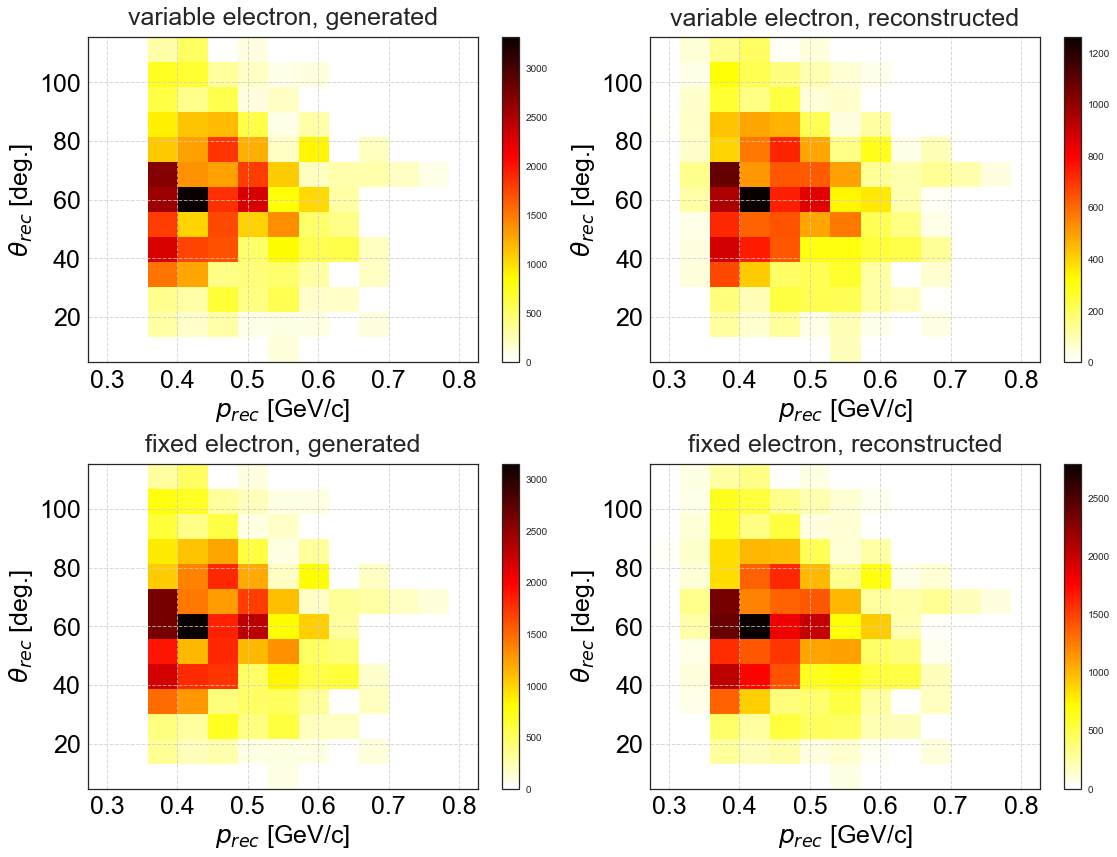

In [40]:
fig = plt.figure(figsize=(16,12))
h = dict()
for i_e,(e_name,gsim_run) in enumerate(zip(['variable','fixed']
                                             ,[2002,2003])):
    h[e_name] = dict()
    for i_var,(var,label) in enumerate(zip(['_g','']
                                           ,['generated','reconstructed'])):


        x_data = simulated_data['run %d'%gsim_run]['Prec_P'+var]
        y_data = simulated_data['run %d'%gsim_run]['Prec_theta'+var]
        data_array = np.array( [x_data , y_data ] )
        h[e_name][label],edges = np.histogramdd( data_array.T,bins=(np.linspace(0.25,0.85,14),np.linspace(0,120,14)))

        x_centres = (edges[0][:-1] + edges[0][1:])/2
        y_centres = (edges[1][:-1] + edges[1][1:])/2
        X,Y = np.meshgrid(x_centres,y_centres)

        ax = fig.add_subplot(2,2,2*i_e+i_var+1)
        im = ax.imshow(h[e_name][label].reshape(len(x_centres),len(y_centres)).T
                   ,cmap='hot_r',origin='bottom'
                   ,extent=(x_centres.min(), x_centres.max(), y_centres.min(), y_centres.max()))
        ax.set_aspect('auto')
        plt.colorbar(im)

        set_axes(ax,r'$p_{rec}$ [GeV/c]',r'$\theta_{rec}$ [deg.]'
                 ,do_add_grid=True,do_add_legend=True,title=e_name+' electron, '+label)

    h[e_name]['accepted'] = acceptance_2d(hgen = h[e_name]['generated'], hrec = h[e_name]['reconstructed'])
plt.tight_layout()

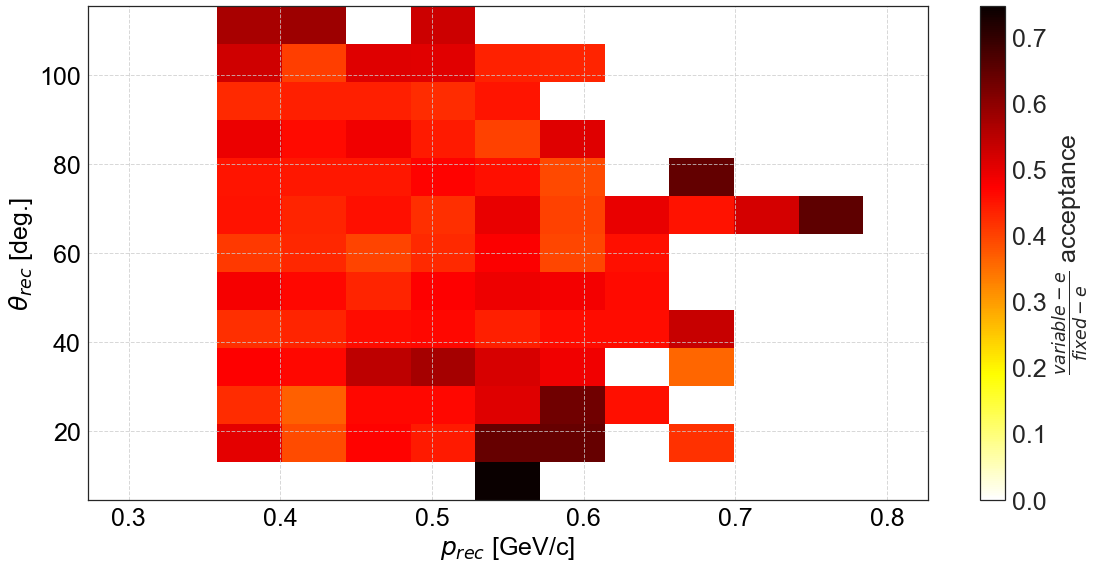

In [48]:
Pmin,Pmax = 0.35,0.65
theta_min,theta_max = 30,80


fig = plt.figure(figsize=(16,8))
hvar2fixed = acceptance_2d(hgen = h['fixed']['accepted'], hrec = h['variable']['accepted'])
ax = fig.add_subplot(1,2,(1,2))
im = ax.imshow(hvar2fixed.reshape(len(x_centres),len(y_centres)).T
                   ,cmap='hot_r',origin='bottom'
                   ,extent=(x_centres.min(), x_centres.max(), y_centres.min(), y_centres.max()))
ax.set_aspect('auto')
cbar = plt.colorbar(im)
cbar.set_label(r'$\frac{variable-e}{fixed-e}$ acceptance', size=25)
cbar.ax.tick_params(labelsize=25) 
set_axes(ax,r'$p_{rec}$ [GeV/c]',r'$\theta_{rec}$ [deg.]'
                 ,do_add_grid=True)

# plt.plot([Pmin,Pmin],[theta_min,theta_max],'-',[Pmax,Pmax],[theta_min,theta_max],'-',color='black')
# plt.plot([Pmin,Pmax],[theta_min,theta_min],'-',[Pmin,Pmax],[theta_max,theta_max],'-',color='black')



# ax = fig.add_subplot(1,2,2)

# acceptance_values = np.zeros((len(hvar2fixed[:,0]),len(hvar2fixed[0,:])))
# for i in range(len(hvar2fixed[:,0])):
#     if x_centres[i]>Pmin and x_centres[i]<Pmax:
#         for j in range(len(hvar2fixed[0,:])):        
#                 if y_centres[j]>theta_min and y_centres[j]<theta_max:
#                     acceptance_values[i,j] = hvar2fixed[i,j]


# acceptance_values = hvar2fixed.flat
# plt.hist(acceptance_values,bins=np.linspace(0.05,1,23))
# set_axes(ax,r'$\frac{variable-e}{fixed-e}$','frequency [a.u.]',do_add_grid=True,do_add_legend=True,title='1d distirbution')
# sigma = np.std(acceptance_values[acceptance_values>0])
# plt.text(np.min(ax.get_xlim())+0.1*(np.max(ax.get_xlim())-np.min(ax.get_xlim()))
#                  ,0.8*np.max(ax.get_ylim()),r'$\sigma=%.1f$'%(100.*sigma)+'%',fontsize=25)


plt.tight_layout()
plt.savefig(figures_path+'AcceptanceRatio2D_Prec_P_Prec_theta.pdf')